In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

Max pixel value of normalized image: 255
Min pixel value of normalized image: 0


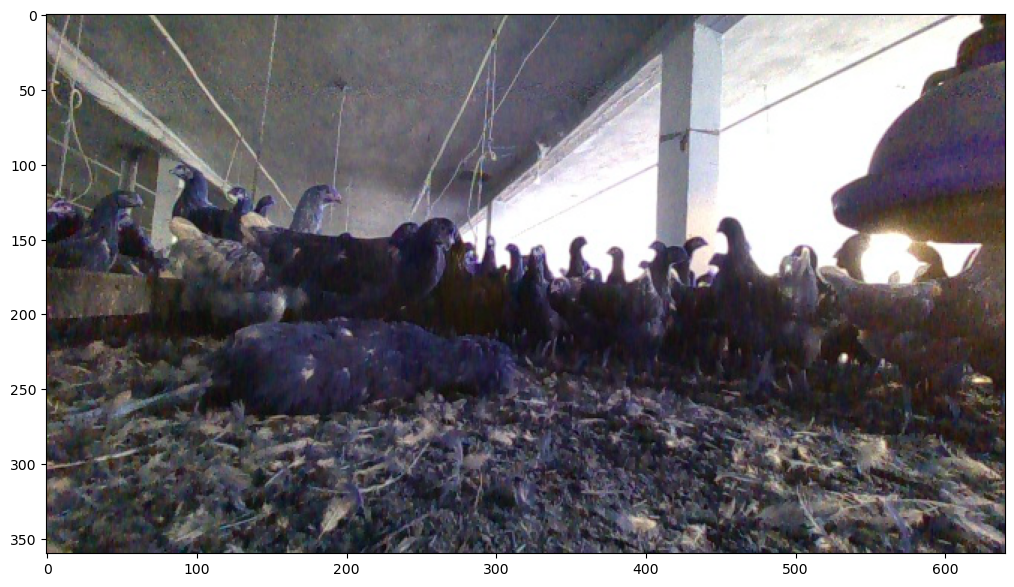

In [2]:
# Example usage
image_path = "/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/raw/rgb_image_20240417_150327.jpg"
# normalized_image_depth = normalize_image(image_path)
image_depth = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

plt.figure(figsize=(15, 7))
plt.imshow(image_depth, cmap='gray')
# plt.title('normalized image')

print("Max pixel value of normalized image:", np.max(image_depth))
print("Min pixel value of normalized image:", np.min(image_depth))

if image_depth is not None:
    # Display or save the normalized image
    cv2.imshow("Normalized Image", image_depth)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [9]:
paths = "/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/raw/"

# Ruta del directorio donde se guardarán las imágenes visualizadas
output_path = "/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/vizualisation/"

# Lista de archivos TIFF en el directorio
tiff_files = [file for file in os.listdir(paths) if file.endswith('.tiff')]

for tiff in tiff_files[:1]:
    # Cargar la imagen (asegúrate de que sea de 16 bits por píxel)
    img = Image.open(paths + tiff)

    # Convertir la imagen a un array de numpy
    img_array = np.array(img)

    # Valores mínimos y máximos conocidos
    min_val = img_array.min()
    max_val = img_array.max()

    # Estandarizar la imagen
    standardized_img = (img_array - min_val) / (max_val - min_val)

    # Escalar al rango 0-65535
    scaled_img = (standardized_img * 65535).astype(np.uint16)

    # Convertir de nuevo a una imagen usando Pillow
    final_img = Image.fromarray(scaled_img)

    # # Opcional: Mostrar la imagen
    final_img.show()

    # # Guardar la imagen estandarizada
    # final_img.save(output_path + f"{tiff}.png")

In [8]:
# Cargar las imágenes. Asegúrate de que todas tengan el mismo tamaño
img_red = cv2.imread('/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/raw/infra1_image_20240417_151137.jpg', cv2.IMREAD_UNCHANGED)  # Canal rojo
img_green = cv2.imread('/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/raw/depth_image_20240417_151137.tiff', cv2.IMREAD_UNCHANGED)  # Canal verde

# img_blue = cv2.imread('path_to_blue_image.jpg', cv2.IMREAD_GRAYSCALE)  # Canal azul

# Comprobar que todas las imágenes tienen el mismo tamaño
print(img_red.shape)
print(img_green.shape)
if img_red.shape != img_green.shape:
    raise ValueError("Todas las imágenes deben tener el mismo tamaño")

# Combinar las imágenes en una sola imagen RGB

img_black = np.zeros_like(img_green, dtype=img_green.dtype)
print(img_black.shape)
img_red = img_red.astype(np.uint16)
img_green = img_green.astype(np.uint16)
img_black = img_black.astype(np.uint16)
img_rgb = cv2.merge([img_red, img_black, img_green])

# Mostrar la imagen resultante
cv2.imshow('Imagen RGB combinada', img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Guardar la imagen combinada
cv2.imwrite('combined_rgb_image.jpg', img_rgb)


(360, 640)
(360, 640)
(360, 640)


True

In [5]:
a = cv2.imread('/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/combined_rgb_image.jpg', cv2.IMREAD_UNCHANGED)

In [4]:
paths = "/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/visualization/thermal_image_20240417_150342.png"

# Ruta del directorio donde se guardarán las imágenes visualizadas
output_path = "/media/quizhpilema.134643/Datos1/Phenomenal_robotics/fotos_ablitas/"

# Cargar la imagen (asegúrate de que sea de 16 bits por píxel)
img = Image.open(paths)

# Convertir la imagen a un array de numpy
img_array = np.array(img)

# Valores mínimos y máximos conocidos
min_val = img_array.min()
max_val = img_array.max()

# Estandarizar la imagen
standardized_img = (img_array - min_val) / (max_val - min_val)

# Escalar al rango 0-65535
scaled_img = (standardized_img * 256).astype(np.uint8)

# Convertir de nuevo a una imagen usando Pillow
final_img = Image.fromarray(scaled_img)
# img8 = (final_img / 256).astype('uint8')

# # Opcional: Mostrar la imagen
final_img.show()

# # Guardar la imagen estandarizada
final_img.save(output_path + "a.jpg")